<h1 align="center"><strong>Netflix Streaming Data</strong></h1>

<h2><strong>1. Read the Data In</strong></h2>

In [41]:
# Import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Read the CSV file in
netflix = pd.read_csv("datasets/AshleyViewingActivity.csv")

In [43]:
# View the first five rows of data
netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ashley,2022-10-03 03:07:28,00:33:42,NaN,The Munsters,NaN,iPad Pro 9.7-Inch (Wi-Fi),00:33:43,00:33:43,US (United States)
1,Ashley,2022-10-03 02:57:22,00:09:19,NaN,Stranger Things: Stranger Things 4: Chapter Si...,NaN,iPad Pro 9.7-Inch (Wi-Fi),01:10:20,01:10:20,US (United States)
2,Ashley,2022-09-18 02:42:20,00:16:13,NaN,Stranger Things: Stranger Things 4: Chapter Si...,NaN,iPad Pro 9.7-Inch (Wi-Fi),01:01:01,Not latest view,US (United States)
3,Ashley,2022-09-12 02:04:54,00:41:43,NaN,Stranger Things: Stranger Things 4: Chapter Si...,NaN,iPad Pro 9.7-Inch (Wi-Fi),00:44:37,Not latest view,US (United States)
4,Ashley,2022-09-11 03:37:02,00:02:44,NaN,Stranger Things: Stranger Things 4: Chapter Si...,NaN,iPad Pro 9.7-Inch (Wi-Fi),00:02:53,Not latest view,US (United States)


<h2><strong>2. Manipulate and Clean the Data</strong></h2>

<h3><strong>Question:</strong></h3>
Which profile watched the most Netflix?

In [44]:
profiles = netflix["Profile Name"].value_counts()

profiles

Duane     12800
Ashley     6719
Brian      3843
Jill       1442
Kids        248
Name: Profile Name, dtype: int64

In [45]:
# Convert back to dataframe for visualisation 
top_profiles = pd.DataFrame({'Profile Name': profiles.index, 'Counts': profiles.values})

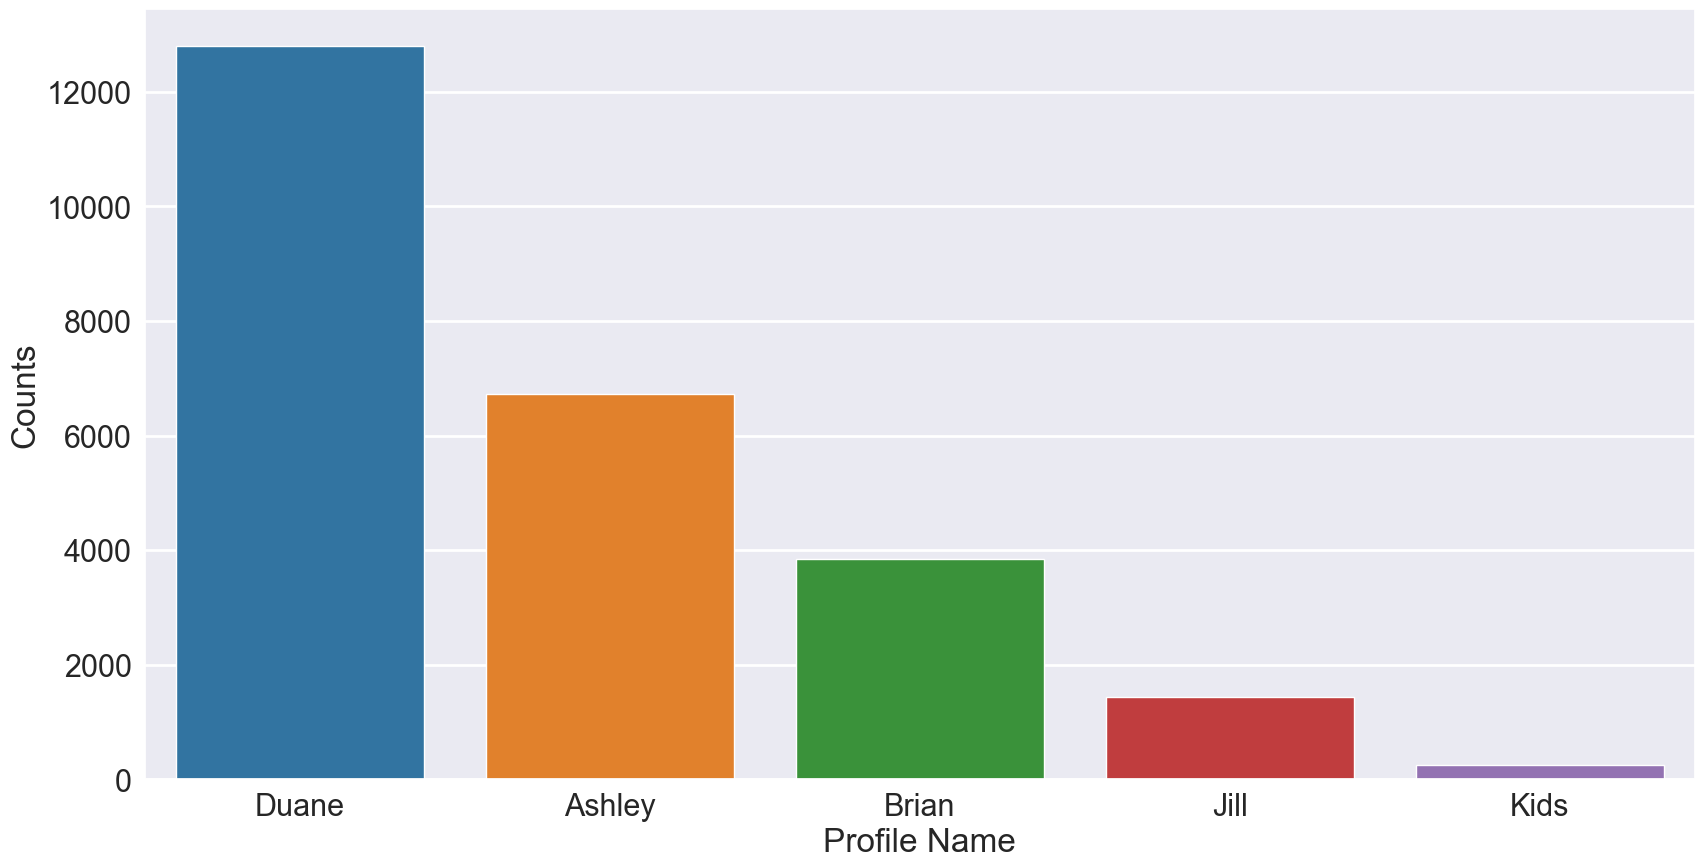

In [46]:
# Create Seaborn Barplot visualizing the profiles
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.set_context('notebook', font_scale = 2, rc = {"grid.linewidth":2}) 

sns.barplot(x = "Profile Name", y= "Counts", data = top_profiles)

plt.show()

<h3><strong>Answer:</strong></h3>
My brother Duane has watched the most Netflix. He's watched double the amount of Netflix as the next profile which is mine. 

In [47]:
# Get a list of all the column names
netflix.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [48]:
# Drop columns that aren't needed
netflix = netflix.drop(columns=["Profile Name", "Attributes", "Duration", "Supplemental Video Type", "Bookmark", "Latest Bookmark", "Country", "Device Type"], axis=1)

# View updated dataframe to make sure that columns were dropped
netflix.head()

,Start Time,Title
0,2022-10-03 03:07:28,The Munsters
1,2022-10-03 02:57:22,Stranger Things: Stranger Things 4: Chapter Si...
2,2022-09-18 02:42:20,Stranger Things: Stranger Things 4: Chapter Si...
3,2022-09-12 02:04:54,Stranger Things: Stranger Things 4: Chapter Si...
4,2022-09-11 03:37:02,Stranger Things: Stranger Things 4: Chapter Si...


In [49]:
# Add a new column "Streaming Service" and fill with "Netflix" so once combined I will know which service this data is from
netflix["Streaming Service"] = "Netflix"

# View the first five rows of data to ensure that new column was added correctly
netflix.head()

,Start Time,Title,Streaming Service
0,2022-10-03 03:07:28,The Munsters,Netflix
1,2022-10-03 02:57:22,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
2,2022-09-18 02:42:20,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
3,2022-09-12 02:04:54,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
4,2022-09-11 03:37:02,Stranger Things: Stranger Things 4: Chapter Si...,Netflix


In [50]:
# Fix the column names in the dataframe
fixed_columns = {
    "Start Time":"Date Watched"
}

# Check that the column names are displaying correctly
netflix.rename(columns=fixed_columns, inplace=True)
netflix.head()

,Date Watched,Title,Streaming Service
0,2022-10-03 03:07:28,The Munsters,Netflix
1,2022-10-03 02:57:22,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
2,2022-09-18 02:42:20,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
3,2022-09-12 02:04:54,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
4,2022-09-11 03:37:02,Stranger Things: Stranger Things 4: Chapter Si...,Netflix


In [51]:
# Get info about the dataframe
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25052 entries, 0 to 25051
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date Watched       25052 non-null  object
 1   Title              25052 non-null  object
 2   Streaming Service  25052 non-null  object
dtypes: object(3)
memory usage: 587.3+ KB


In [52]:
# Store the cleaned dataframe as a variable to use in the main notebook
netflix_cleaned = netflix
%store netflix_cleaned

Stored 'netflix_cleaned' (DataFrame)
